In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from hmmlearn.hmm import GaussianHMM

In [3]:
QQQ = pd.read_csv('QQQ.csv')

In [4]:
QQQ

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,96.187500,96.187500,90.750000,94.750000,83.116226,36345200
1,2000-01-04,92.000000,93.500000,87.937500,88.250000,77.414307,33786600
2,2000-01-05,87.500000,89.625000,84.250000,86.000000,75.440605,42496600
3,2000-01-06,86.875000,88.000000,79.750000,80.093750,70.259529,37134800
4,2000-01-07,82.937500,90.000000,82.500000,90.000000,78.949440,28138200
...,...,...,...,...,...,...,...
4995,2019-11-08,200.070007,201.250000,199.539993,201.229996,201.229996,15258800
4996,2019-11-11,200.210007,201.039993,199.940002,200.960007,200.960007,10147600
4997,2019-11-12,201.130005,202.210007,200.820007,201.539993,201.539993,14778300
4998,2019-11-13,200.839996,201.779999,200.710007,201.589996,201.589996,15774600


In [5]:
#Retain variables
dates = np.array(QQQ[['Date']])
close_v = np.array(QQQ[['Close']])
volume = np.array(QQQ[['Volume']])[1:]

In [12]:
diff = close_v[1:] - close_v[:-1] # a(n+1) - a(n)
dates = dates[1:]
close_v = close_v[1:]

In [13]:
X = np.column_stack([diff, volume])

In [19]:
X

array([[-6.50000e+00,  3.37866e+07],
       [-2.25000e+00,  4.24966e+07],
       [-5.90625e+00,  3.71348e+07],
       ...,
       [ 5.79986e-01,  1.47783e+07],
       [ 5.00030e-02,  1.57746e+07],
       [-1.60003e-01,  1.69454e+07]])

In [20]:
# Run Gaussian HMM
print("fitting to HMM and decoding ...", end='')
n_components = 5
# make an HMM instance and execute fit
model = GaussianHMM(n_components, covariance_type="full", n_iter=100)
model.fit(X)
# predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done\n")

fitting to HMM and decoding ...done



Transition matrix
[[9.64964456e-001 6.66338230e-003 1.33643465e-003 4.26288917e-012
  2.70357266e-002]
 [2.59137567e-003 9.28575809e-001 5.59068781e-191 6.88328149e-002
  2.21105502e-087]
 [2.67033762e-010 2.21279028e-145 9.06989504e-001 5.65424403e-113
  9.30104957e-002]
 [3.01252013e-003 1.12932087e-001 1.00408206e-157 8.84055393e-001
  6.92194875e-075]
 [1.83690797e-002 3.66198128e-097 2.73175981e-002 2.62073602e-085
  9.54313322e-001]]

means and vars of each hidden state
0th hidden state
mean =  [1.31773741e-02 6.40053523e+07]
var =  [3.88036398e-01 3.08276504e+14]

1th hidden state
mean =  [1.92782332e-01 2.66008042e+07]
var =  [5.48757594e-01 6.48338553e+13]

2th hidden state
mean =  [-1.36308657e-01  1.87219441e+08]
var =  [9.18111850e-01 4.49611374e+15]

3th hidden state
mean =  [-2.11792290e-01  4.97575777e+07]
var =  [6.58188568e+00 4.72743396e+14]

4th hidden state
mean =  [4.32759023e-02 1.00107763e+08]
var =  [2.32064693e-01 5.89045876e+14]



TypeError: unhashable type: 'numpy.ndarray'

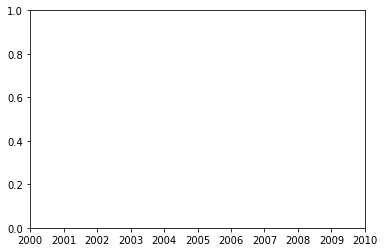

In [18]:
# print trained parameters and plot
print("Transition matrix")
print(model.transmat_)
print()

print("means and vars of each hidden state")
for i in range(n_components):
    print("%dth hidden state" % i)
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
fig = pl.figure()
ax = fig.add_subplot(111)

for i in range(n_components):
    # use fancy indexing to plot data in each state
    idx = (hidden_states == i)
    ax.plot_date(dates[idx], close_v[idx], 'o', label="%dth hidden state" % i)
ax.legend()

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()

# format the coords message box
ax.fmt_xdata = DateFormatter('%Y-%m-%d')
ax.fmt_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

fig.autofmt_xdate()
pl.show()